In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
from matplotlib.pyplot import *
# Import needed packages from positive
from positive.plotting import sYlm_mollweide_plot
from positive import alert
# Import other usefuls
from os.path import expanduser
from nrutils import scsearch,gwylm
from nrutils.core.basics import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


In [3]:
#
A = scsearch(keyword = 'q4a04t120dP0D_T_96_360', verbose = True )
# A = scsearch(keyword = 'q1a08t60dPm1.5_T_96_408', verbose = True )

(scsearch)>> Found keyword (=q4a04t120dP0D_T_96_360) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q4: 1chi0.40-p-q4.00	(q4a04t120dP0D_T_96_360)



In [30]:
#
inertial_y = gwylm( A[-1], lmax=2, dt=0.5, verbose=True )

(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found lmax (=2) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10c93d3f8>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, -2), (2, -1), (2, 0), (2, 1)]
(load)>> Using the default extraction_parameter of 5
(load)>> Using the default level of 7
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeated time values were found in the array. 

In [47]:
# y = inertial_y.__calc_coprecessing_frame__()
# y = inertial_y.copy()
y = inertial_y.__calc_j_of_t_frame__()

(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated.


Y22
w(2, 2)_pt = 0.440544
w(2, 1)_pt = 0.408075
w(2, -1)_pt = -0.408075
w(2, -2)_pt = -0.440544
frd =  0.440925284714


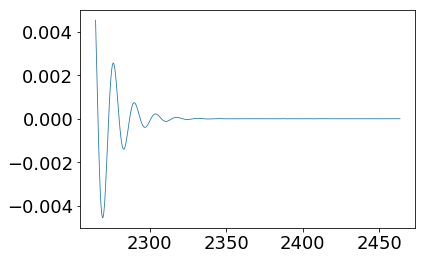

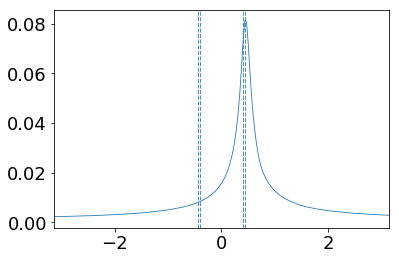

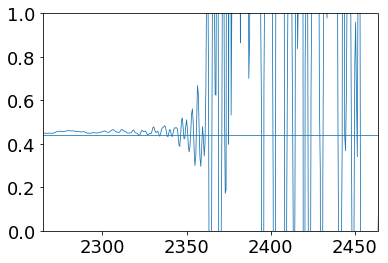

Y21
w(2, 2)_pt = 0.440544
w(2, 1)_pt = 0.408075
w(2, -1)_pt = -0.408075
w(2, -2)_pt = -0.440544
frd =  0.40943062152


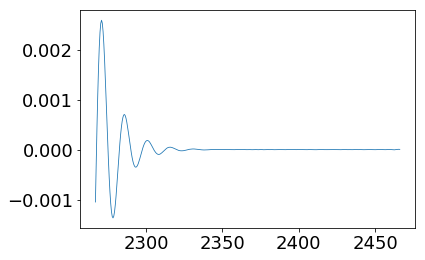

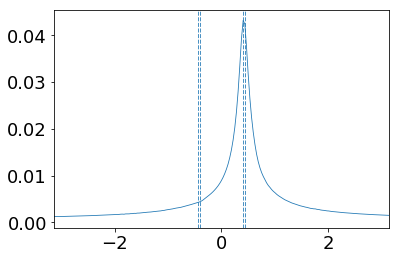

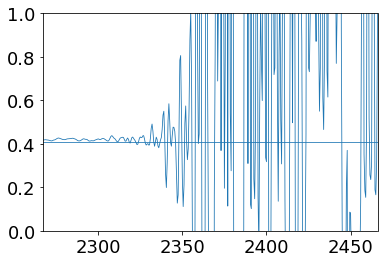

In [49]:

y22 = y[2,2]['psi4']
y21 = y[2,1]['psi4']

from kerr import leaver 


def frdplot(yy):
    
    t0 = y.t[ yy.k_amp_max ] + 20
    t1 = y.t[ yy.k_amp_max ] + 220
    mask = (y.t>t0) & (y.t<t1)

    figure()
    trd = y.t[mask]
    yrd = yy.y[mask]
    plot( trd, yrd )

    from scipy.fftpack import fft, fftfreq, fftshift, ifft

    N = len(trd)
    dt = trd[1]-trd[0]
    f = fftshift(fftfreq( N, dt ))
    fdyrd = fftshift( fft( yrd ) ) * dt

    figure()
    plot( 2*pi*f, abs(fdyrd) )
    xlim(2*pi*0.5*array([-1,1]))
    wpt = {}
    for k in [ (2,2), (2,1), (2,-1), (2,-2) ]:
        wpt[k] = leaver(y.xf,k[0],k[1],Mf=y.mf)[0].real
        print 'w%s_pt = %f'%(k,wpt[k])
    for k in wpt:
        axvline( wpt[k], ls='--' )
        
    #axvline( 4*wpt[2,1], ls='--', color='orange', alpha=0.5 )
    #axvline( wpt[2,2]-wpt[2,1], ls='--', color='magenta', alpha=0.5 )
    
    #
    wrd = 2*pi*f[ argmax(abs( fdyrd )) ]
    print 'frd = ', 2*pi*f[ argmax(abs( fdyrd )) ]

    figure()
    plot( yy.t, yy.dphi )
    axhline( wrd )
    xlim( lim(trd) )
    ylim( [0,1] )
    
#
print 'Y22'
frdplot(y22)
show()
print 'Y21'
frdplot(y21)
show()